# Binary Classification Prediction for type of Breast Cancer

## Machine Learning Course - NCSR Demokritos 2022-2023

### Author: Alexandros Filios - mtn2219

### Supervisor: Theodoros Giannakopoulos

## 1. Introduction

### 1.1 About

Breast cancer is a major public health concern worldwide, as it is the most common cancer among women and the second most common cancer overall. According to the World Health Organization, breast cancer accounted for 25% of all cancer cases and affected over 2.1 million people in 2015 alone. The disease occurs when the cells in the breast begin to grow uncontrollably, often forming tumors that can be detected through imaging or felt as lumps in the breast area. Early detection and treatment are crucial for improving the prognosis of breast cancer patients.

### 1.2 Description

In this classification problem, we are given a dataset of breast cancer cases, each with 30 characteristics, or features. These features include measurements such as the mean radius, mean texture, mean perimeter, and mean area of the tumors, as well as various other measurements related to smoothness, compactness, concavity, and symmetry. The goal of this study is to use these features to predict whether a given case is malignant or benign, with the ultimate goal of improving the early detection and treatment of breast cancer.

The models that will be used in this study include various machine learning algorithms, including Logistic Regression, KNN (k-nearest neighbors algorithm), Naive Bayes classifier, Gaussian Discriminant Analysis, SVM (Support vector machine), Decision Tree, Random Forest, Gradient Boosting, and AdaBoost (Adaptive Boosting). These models will be trained and evaluated on the dataset in order to determine their effectiveness in predicting the type of breast cancer.

### 1.3 Goal

The main goal of this project is to investigate the impact of feature engineering on the performance of various machine learning models for breast cancer classification. Specifically, the study aims to:

- Identify the most relevant features for predicting breast cancer type by using various feature selection techniques such as histograms, Pearson correlation, wrapper methods, and Lasso.

- Evaluate the performance of the models before and after feature engineering, in order to determine the impact of feature selection and scaling on the predictive power of the models.

- Compare the performance of different models and identify which models are most effective for this classification problem and what factors contribute to their success.

## Libraries:



In [2]:
# ------------------------------------------------------------------------------
#                              Data
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# ------------------------------------------------------------------------------
#                               ML
# ------------------------------------------------------------------------------
# Scaling
from sklearn.preprocessing import StandardScaler
# Split
from sklearn.model_selection import train_test_split
# Models/Methods
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score

# Feature Selection:
from sklearn.feature_selection import SequentialFeatureSelector as SFS # Wrappers
from sklearn.linear_model import LassoCV # Lasso

# ------------------------------------------------------------------------------
#                               Plots
# ------------------------------------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

## 2. Data Processing

In this chapter we are going to handle our data in such a way, that allows us to make the absolute optimal utilization of the information. 

### 2.1 Read the data
The csv file we are using is downloaded via: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset.
We are going to open the data direclty into a pandas dataframe.  

In [3]:
df=pd.read_csv("breast-cancer.csv") # Read the .csv file and get the pandas dataset

### 2.2 Dataset Formatting
We are now going to bring the data in the form of X, y and make the necessary changes.
Where:
- *X* : the feagure vector
- *y*: the target/label vector

With a quick look into the available features we can easily assume that the id characteristic is irrelevant for our purpose. In parallel, in order to make the implementation a bit easier, we are going to transform the labels from M(Malignant) & B(Benign) to 1 & 0 respectively.

In [4]:
# Remove the id as it does not actually resemble a feature
df = df.drop("id", axis=1)
# Encode the diagnosis label as follows: 1 for Malignant & 0 Benign
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) 
# Extract the labels for all of our data
y = df["diagnosis"]
# Remove the labels from the data
X = df.drop("diagnosis", axis=1)

In [5]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 2.3 Class  Label Imbalance 

Before we proceed to the actual filtering of the data, we are going to make a quick check around the analogy of the two available targets/labels, M & B. The result we retrieve mentions that the **Malignant cases populate around 35%** of the incidents. That analogy is not something to worry about, but sure should be noted.  

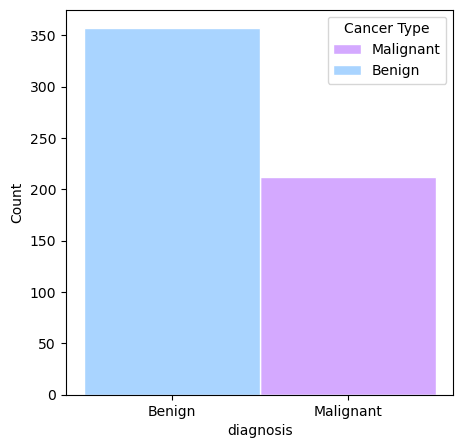

In [6]:
# Figures size
plt.figure(figsize=(5,5))
# Plot
fig = sb.histplot(data=df, x="diagnosis", hue="diagnosis", palette = 'cool', discrete = True, edgecolor='w')
# Make the X-Axes Labels more explanatory
fig.set_xticks([0, 1],['Benign', 'Malignant']) #custom tickers with custom labels
# Make the legend more explanatory 
fig.legend(title='Cancer Type', bbox_to_anchor=(1, 1), labels=['Malignant', 'Benign'])
# Show it
plt.show()

### 2.4 Data Split

The following step is really crucial, as we need to seperate a portion of our data and isolate it for the rest of the implementation.
That way the results we are going to get are not going to be biased because of some micure with the training data(the rest of the data after the split). 

From the 568 examples, we are going to use 20%(114 examples) for our testing later on. The selection is stratified which implies that a the training set resemples a similar portion with the whole X, in terms of target/label analogy.  

In [7]:
# Split the  data into Training and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10, stratify=y)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

## 3. Feature Selection

In this implementation, feature selection is the main section that is going to concern us. Mainly because of teh nature of the problem that does not need feature extraction in the first place. On the other hand the number of features (30) calls for a further investigation into the matter. 

There are several reasons to apply feauture selection on our data. From achieving better performance to even avoiding overfitting. Of course some of the classfiers we are going to use are considered to be robust to noisy/non-informative features. Despite that fact in this implementation we will try to achieve simple and faster models and reduce the number of features, by keeping the most meaningful ones, in a way that makes the data more understandable for both the developers and the possible clients(in our case doctors and patients). 

Feature selection is done after data preprocessing. Ideally  all the categorical variables should be encoded into numbers, so that we can assess how deterministic they are for target. Currently we are dealling with numerical columns only, so we may proceed. 

We are going to use several techniques in order to come to a conclusion regarding the final delection. 
1) Histograms
- A correlation of each feature with the target/label training vector.
- If the two areas intercept each other the feature by it self is not a valuable information.
2) Measure (Pearson) correlation
- Between features (we want it to be small!) or
- Between features and target values (we want it to be big!)
3) Using a “Wrapper” method:
- Train and evaluate a model with different features and use its performance to evaluate the features used
- Backward elimination: use all features and remove features
- Recursive elimination: recursively remove features and build a model on the remaining features (uses accuracy)
4) Lasso (also used for regularization)
- The LASSO method regularizes model parameters by shrinking the regression coefficients, reducing some of them to zero. 
- The feature selection phase occurs after the shrinkage, where every non-zero value is selected to be used in the model.

Following are all the available features that we are going to analyze in order to get the optimal subset.
We are going to compare and combine all the above methods and then end-up with a final feature vector. Finally we are going to prove that the selection indeed made our metrics get optimized.

### 3.1 Histograms

The feature vector is composed by 30 different characteristics. But the question that comes in mind is: ***are they actually that different?***. By observing the histograms we are going to take a first glimpse in the importance of those features. Of course we cannot make our final assumptions with only that information as the combination of some characteristics could be proved to be useful for our training, while individually they may not show some significant importance.

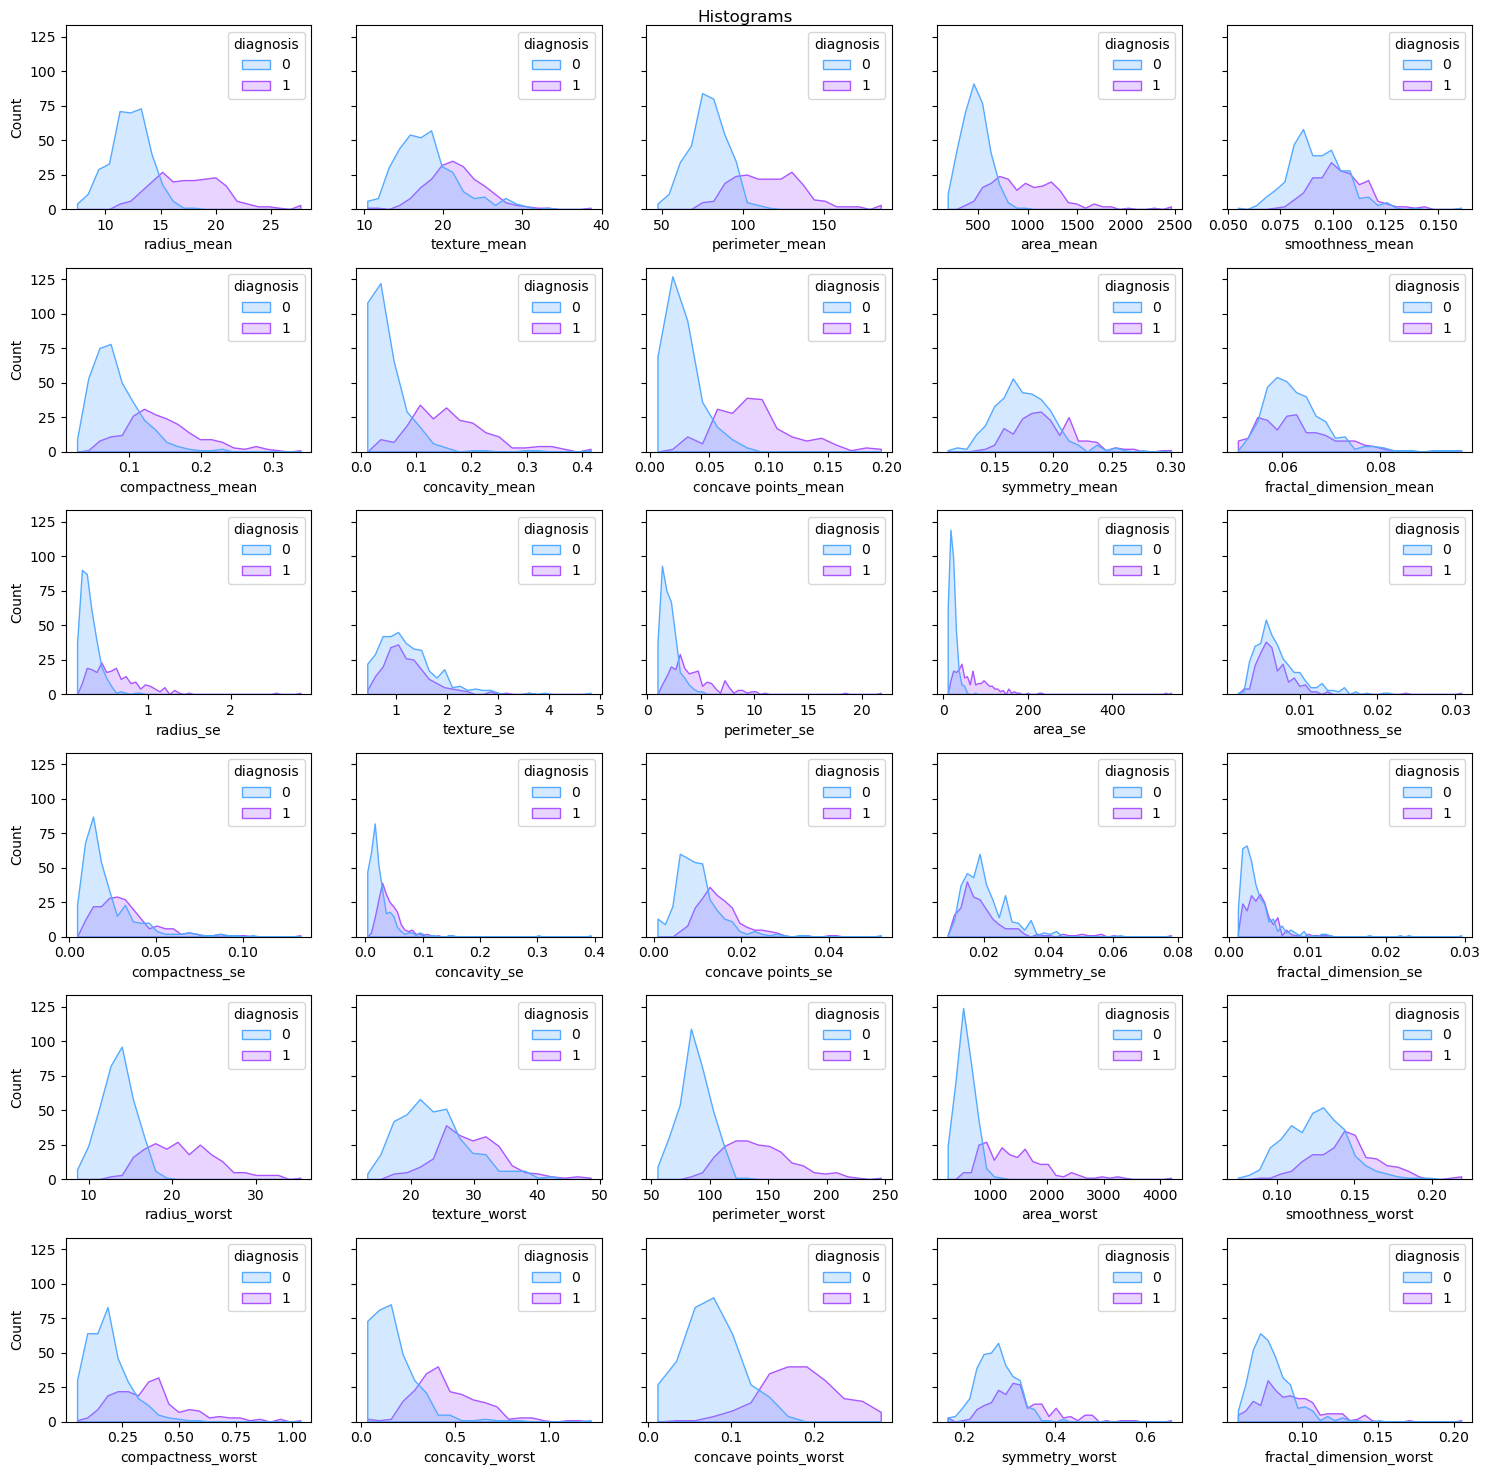

In [8]:
# Init number of rows
num_of_rows = 6
# Init number of columns
num_of_cols = 5
# Init the subplots
fig, axes = plt.subplots(num_of_rows, num_of_cols, figsize=(15, 15),  tight_layout=True, sharey=True)
# Main title
fig.suptitle('Histograms')
i=0
j=0
# For every feature
for feature in df.columns:
    # If the feature is the first one
    if(feature == 'diagnosis'):
        # skip it
        continue
    # In any other case, make a histogram plot
    sb.histplot(ax=axes[i,j], data=df, x=feature, hue="diagnosis",element="poly", palette = 'cool')
    # Handle the grid
    if(j == num_of_cols-1):
        i+=1
        j=0
    else:
        j+=1

**Result**:
From the above histograms(one for each features in correlation with the diagnosis) we can observe that when the areas that appear merge together, we do not really have a clear view that proves the importance of the feature. So as an assumption, we will keep a list of features that seem to have some correlation with the target value. Of course this won't be our only indicator, but we are going to consider it equally. Thus several runs have been tested in order to find an appropriate solution.

In [9]:
histogram_relevant_features = ['radius_mean','perimeter_mean','area_mean',
                               'compactness_mean','concavity_mean','concave points_mean','area_se','radius_worst',
                              'perimeter_worst','area_worst','concavity_worst', 'concave points_worst']

### 3.2 Pearson Correlation Coefficient 

In statistics, the Pearson correlation coefficient is a measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus, it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. As with covariance itself, the measure can only reflect a linear correlation of variables, and ignores many other types of relationships or correlations. In our case the correlation indicates whether two features 'behave' similarly in our dataset. In order to simplify the numbers we only needed the absolute value so we can make the calculations easier later.

In [10]:
pearsoncorr = X_train.corr(method='pearson').abs()

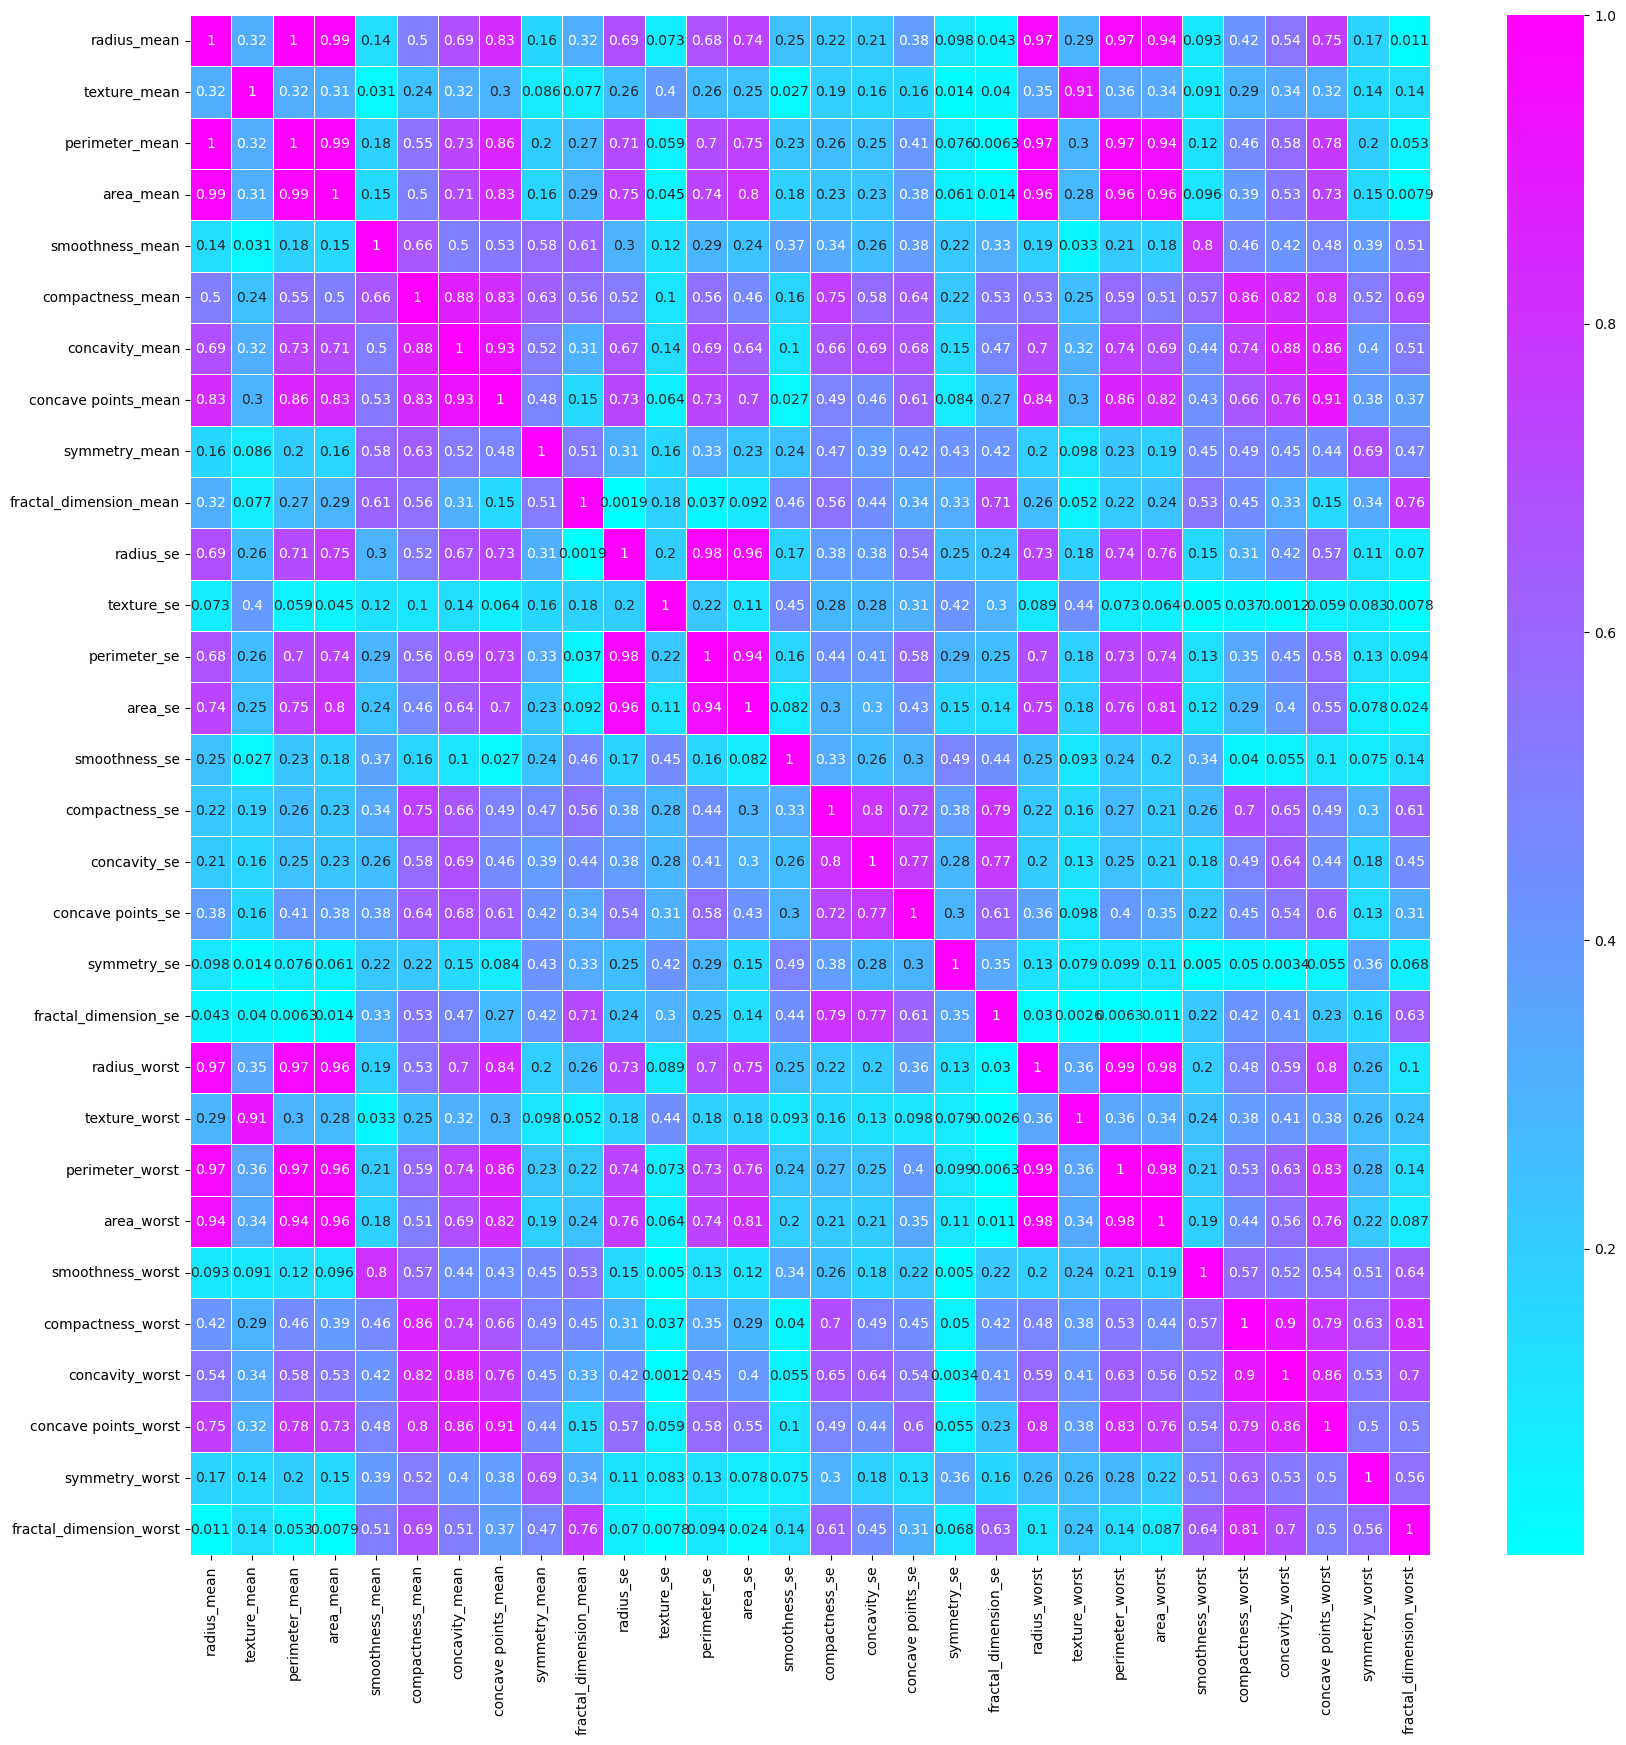

In [11]:
plt.figure(figsize=(20,20))
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='cool',#cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.show()

In [12]:
# Get the upper tringular matrix of the dataframe
upper_tri = pearsoncorr.where(np.triu(np.ones(pearsoncorr.shape),k=1).astype(bool))

# So we are selecting the columns which are having absolute correlation greater than 0.95 and making a list of those columns named 'to_drop'.
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

# Now we are droping the columns which are in the list 'to_drop' from the dataframe
pearson_df = X.drop(columns = to_drop)

# Collect the names of the features
pearson_relevant_features = pearson_df.columns

##### Result:
At this point we are going to keep the features that have less correlation than **95%** in a hope that we are going to make the data a bit lighter. Note that Correlation matrix will be mirror image about the diagonal and all the diagonal elements will be 1. So, It does not matter that we select the upper triangular or lower triangular part of the correlation matrix ,but we should not include the diagonal elements. So we are selecting the upper traingular. By following the above procedure we now possess the relevant names according to Pearson

### 3.3 Wrapper

Wrapper methods evaluate multiple models using procedures that add and/or remove features to find the optimal combination that maximizes model performance.

Generally, three directions of procedures are possible:

- Forward selection — starts with one feature and adds more iteratively. At each subsequent iteration, the best of the remaining original features are added based on performance criteria.

- Backward elimination — starts with all features and eliminates one-by-one iteratively.

- Step-wise selection — bi-directional, based on a combination of forward selection and backward elimination. It is considered less greedy than the previous two procedures since it does reconsider adding predictors back into the model that has been removed (and vice versa). Nonetheless, the considerations are still made based on local optimization at any given iteration.

For this implementation we are going to use Forward Selection as a method.

#### 3.3.1 Forward selection

This Sequential Feature Selector adds features to form a feature subset in a greedy fashion. At each stage, this estimator chooses the best feature to add based on the cross-validation score of an estimator. In this implementation we are using a cross-validation size of 5 (which is also the default one). Also we selected that the number of relevant features that are going to be returns are *15* (half of the starting number). Last but not least, the model we are going to use to make the validation is the Logistic Regression Model, a reliable algorithm that we are going to analyze later. 

In [13]:
# Define Sequential Forward Selection (sfs)
sfs = SFS(LogisticRegression(solver='lbfgs', max_iter=1000), 
           n_features_to_select= None,
           direction="forward", 
           scoring = None,
           cv=5,
           n_jobs=None)
sfs.fit(X_train, y_train)
# Collect the names of the features 
sfs_relevant_features = sfs.get_feature_names_out()

/Users/alexandrosfilios/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/feature_selection/_sequential.py:188: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


**Result**: 
The Wrapper method is one of the slowest functions used in this implementation, despite the tuning of its paremeters. We believe that the reason behind that issue is that the algorithm is greedy. We now possess the relevant features according to the Wrapper method we selected, under the variable name *sfs_relevant_features*.

### 3.4 Lasso

It is a linear model that uses this cost function:
$$ \frac{1}{2N_{training}} \sum_{i=1}^{N_{training}}(y^{(i)}_{real} - y^{(i)}_{pred} )^2 + α \sum_{j=1}^n|α_j|$$

In the above cost function, $ a_j $ is the coefficient of the *j*-th feature. The final term is called $l_1$ penalty and *α* is a hyperparameter that tunes the intensity of this penalty term. The higher the coefficient of a feature, the higher the value of the cost function. So, the idea of Lasso regression is to optimize the cost function reducing the absolute values of the coefficients. Obviously, this works if the features have been previously scaled, for example using standardization or other scaling techniques. The *α* hyperparameter value must be found using a cross-validation approach.

Trying to minimize the cost function, Lasso regression will automatically select those features that are useful, discarding the useless or redundant features. In Lasso regression, discarding a feature will make its coefficient equal to 0.

So, the idea of using Lasso regression for feature selection purposes is very simple: we fit a Lasso regression on a scaled version of our dataset and we consider only those features that have a coefficient different from 0. Obviously, we first need to tune α hyperparameter in order to have the right kind of Lasso regression.

In [14]:
# Lasso Regression Cross-validation
# A quick scaling to apply the Lasso (We are going to explain scaling later)
scale_lasso = StandardScaler().fit(X_train)
# Apply the scaling to the train data
X_train_scaled_lasso = scale_lasso.transform(X_train)
# Create an instance of Lasso Regression implementation
lasso_cv = LassoCV(cv=5, tol=1e-2)
# Fit the Lasso model
lasso_cv.fit(X_train_scaled_lasso, y_train)
# Create the coefficients
coefficients_lasso = lasso_cv.coef_
# Get all the features with their coefficients
features_lasso = df.columns[1:].to_numpy()
# create a df
df_lasso = pd.DataFrame({'feature': features_lasso, 'coefficient': list(coefficients_lasso)}, columns=['feature', 'coefficient'])
# filter the relevant
df_lasso_accepted = df_lasso[df_lasso["coefficient"] != 0].reset_index(drop=True)
# and the non relevant ones
df_lasso_denied = df_lasso[df_lasso["coefficient"] == 0].reset_index(drop=True)
# keep the relevant as a list
lasso_relevant_features =  list(df_lasso_accepted['feature'])

**Result:**
At this point Lasso Feature Selection has finished. We need to mention at this point that in order to apply lasso we made a standarization on our data. Later on we are going to discuss the normalization standarization with more detail. For now what we need to know is that the relevant features according to Lasso are available under the variable name *lasso_relevant_features*.

### 3.5 Method combination

Now that we have collected all of the relevant feature lists according to all of the methods we wanted, we are ready to visualize and compare those selections.

In [15]:
relevant_features_df = pd.DataFrame(columns = ['Histogram','Pearson', 'Wrapper','Lasso'], index = X.columns)
for index in relevant_features_df.index:
    # Histogram
    if(index in histogram_relevant_features):
        relevant_features_df.loc[index, 'Histogram'] = True
    else:
        relevant_features_df.loc[index, 'Histogram'] = False  
    # Pearson
    if(index in pearson_relevant_features):
        relevant_features_df.loc[index, 'Pearson'] = True
    else:
        relevant_features_df.loc[index, 'Pearson'] = False
    # Wrapper
    if(index in sfs_relevant_features):
        relevant_features_df.loc[index, 'Wrapper'] = True
    else:
        relevant_features_df.loc[index, 'Wrapper'] = False
     
    # Lasso
    if(index in lasso_relevant_features):
        relevant_features_df.loc[index, 'Lasso'] = True
    else:
        relevant_features_df.loc[index, 'Lasso'] = False   

We are going to create a boolean dataframe that contains a True value whenever a feature was selected from the respective method.

In [16]:
def color_boolean(val):
    color =''
    if val == True:
        color = 'paleturquoise'
    elif val == False:
        color = 'lightcoral'
    return 'background-color: %s' % color

In [17]:
relevant_features_df.style.applymap(color_boolean)

,Histogram,Pearson,Wrapper,Lasso
radius_mean,True,True,False,True
texture_mean,False,True,False,False
perimeter_mean,True,False,False,False
area_mean,True,False,False,True
smoothness_mean,False,True,True,True
compactness_mean,True,True,True,True
concavity_mean,True,True,True,True
concave points_mean,True,True,True,True
symmetry_mean,False,True,True,True
fractal_dimension_mean,False,True,True,True


Based on the above dataframe we are going Democratically choose the features that appear at least 3 times (more than 50%) in our data. Thus, we ended up with 18 final features (Out of the 30 initial ones) and our dataset is simplified. We now need to prove our assumption that this selection is better in most (if not all) the cases. 

In [18]:
final_features = []
for index in relevant_features_df.index:
    votes = 0
    for column in relevant_features_df.columns:
        if bool(relevant_features_df.loc[index][column]):
            votes+=1
    if(votes>2):
        final_features.append(index)
X_train_fs = X_train[final_features]
X_test_fs  = X_test[final_features]
X_train_fs

,radius_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,area_worst,concavity_worst,concave points_worst
0,14.110,0.09309,0.05306,0.01765,0.027330,0.1373,0.05700,0.006692,0.01132,0.005717,0.006627,0.01416,0.002476,15.530,18.00,749.9,0.05307,0.05890
1,11.640,0.11420,0.10170,0.07070,0.034850,0.1801,0.06520,0.008540,0.02310,0.029450,0.013980,0.01565,0.003840,13.140,29.26,521.7,0.28730,0.12180
2,12.750,0.11250,0.11170,0.03880,0.029950,0.2120,0.06623,0.007509,0.01561,0.019770,0.009199,0.01805,0.003629,14.450,21.74,624.1,0.14230,0.08045
3,13.940,0.12480,0.09755,0.10100,0.066150,0.1976,0.06457,0.010040,0.03247,0.047630,0.028530,0.01715,0.005528,14.620,15.38,653.3,0.15590,0.10150
4,16.140,0.09495,0.08501,0.05500,0.045280,0.1735,0.05875,0.003958,0.01246,0.018310,0.008747,0.01500,0.001621,17.710,19.58,947.9,0.23100,0.11290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,24.250,0.14470,0.28670,0.42680,0.201200,0.2655,0.06877,0.023330,0.09806,0.127800,0.018220,0.04547,0.009875,26.020,23.99,2073.0,0.58030,0.22480
451,12.850,0.07551,0.08316,0.06126,0.018670,0.1580,0.06114,0.006011,0.04480,0.051750,0.013410,0.02669,0.007731,14.400,27.01,645.8,0.18380,0.05601
452,12.220,0.10960,0.11520,0.08175,0.021660,0.2124,0.06894,0.006272,0.02198,0.039660,0.009894,0.01320,0.003813,13.160,24.17,515.3,0.35350,0.08088
453,12.250,0.08654,0.06679,0.03885,0.023310,0.1970,0.06228,0.005518,0.01562,0.019940,0.007924,0.01799,0.002484,13.590,25.22,564.2,0.19430,0.08211


## 4. Feature Scaling

As the name of this section describes, feature scaling brings each and every feature in a more controlled range. That way, we can manage to avoid unwanted scenarios with numerical overflow. This method has as a direct effect the increased speed in learning, as well as, in other techniques as well. As a matter of fact, several algorithms are affected by distanced data so scaling is a trustworthy solution.

The two most discussed scaling methods are Normalization and Standardization. Normalization typically means to rescale the values into a range of [0,1]. Standardization typically means to rescale data to have a mean of 0 and a standard deviation of 1 (unit variance).

In this implementation we are going to use Standardization as it is more reliable and not that disturbed when noise occurs in the data.

**Note**: Scaling parameters (either min/max or μ/σ) are computed on the training set. Later on the testing set we are going to apply the same scaling we stored from before. *Thus we still keep the test set independent.*

In [19]:
scale = StandardScaler().fit(X_train_fs)
X_train_fs_sc = scale.transform(X_train_fs)
X_test_fs_sc = scale.transform(X_test_fs)  

## 5. Model Training

Now that our data have been processed and feature selection and scaling have been applied, we are ready to discuss our assumptions about their importance. We are going to train all of our models with and without the changes we made and then we are going to compare the differences. 

In [20]:
results = pd.DataFrame()

In [21]:
# This is the main function we are going to use for our trianing and evaluation. 
# Each model is an input parameter and is handled in a similar way with the others.
def train_evaluate_model(model,X_train,y_train,X_test,y_test):
    
    # Fit the model
    model.fit(X_train, y_train)  #fit the model instance 
    
    # Make the predictions
    predictions = model.predict(X_test) # calculate predictions
    
    # Compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions) # Accuracy
    f1 = f1_score(y_test, predictions) # F1
    precision = precision_score(y_test, predictions) # Precision Score
    recall = recall_score(y_test, predictions) # Recall
    balanced_accuracy = balanced_accuracy_score(y_test, predictions) # Balanced Accuracy

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return eval_df

### 5.1 Logistic Regression

Logistic regression is a statistical method that is used for building machine learning models where the target label is binary. Logistic regression is used to describe data and the relationship between one dependent (type of cancer) variable and one or more independent variables (features).

In [22]:
lg_results = pd.DataFrame()
lg_clf_before = LogisticRegression(solver='lbfgs', max_iter=3000, random_state=0)
lg_clf_after = LogisticRegression(solver='lbfgs', max_iter=3000, random_state=0)
# -----------------------------------------------------------------------------------
# Before Feature Selection and Scaling
lg_before = train_evaluate_model(lg_clf_before, X_train, y_train, X_test, y_test)
lg_before.index = ['LogisticRegression']
lg_before['Selection & Scaling'] = "Before"
lg_results = pd.concat([lg_results,lg_before])
results = pd.concat([results,lg_before])
# -----------------------------------------------------------------------------------
# After Feature Selection and Scaling
lg_after = train_evaluate_model(lg_clf_after, X_train_fs_sc, y_train, X_test_fs_sc, y_test)
lg_after.index = ['LogisticRegression']
lg_after['Selection & Scaling'] = "After"
lg_results = pd.concat([lg_results,lg_after])
results = pd.concat([results,lg_after])
# -----------------------------------------------------------------------------------
# Result
lg_results.reset_index().style.background_gradient(cmap = sb.color_palette("cool", as_cmap=True))

,index,accuracy,f1_score,precision,recall,balanced_accuracy,Selection & Scaling
0,LogisticRegression,0.938596,0.913580,0.948718,0.880952,0.926587,Before
1,LogisticRegression,0.973684,0.963855,0.975610,0.952381,0.969246,After


**Discussion:**

In conclusion, the Logistic Regression model has shown a significant improvement in performance after applying feature engineering techniques, with the most notable changes seen in accuracy, F1 score, precision and recall. The accuracy increased from 0.938596 to 0.973684, indicating that the model is now better able to correctly classify more samples. The F1 score increased from 0.913580 to 0.963855, indicating that the model has improved in its ability to balance both precision and recall. The precision increased from 0.948718 to 0.975610, indicating that the model is now making more true positive predictions and less false positive predictions. The recall also increased from 0.880952 to 0.952381, indicating that the model is now better able to identify all the actual positive samples. These results indicate that the Logistic Regression model can be a strong classifier for this binary classification problem with good performance when the features are well selected and scaled.

### 5.2 KNN (K-Nearest Neighbors Algorithm)

In [23]:
knn_results = pd.DataFrame()
knn_clf_before = KNeighborsClassifier(n_neighbors=12)
knn_clf_after = KNeighborsClassifier(n_neighbors=12)
# -----------------------------------------------------------------------------------
# Before Feature Selection and Scaling
knn_before = train_evaluate_model(knn_clf_before, X_train, y_train, X_test, y_test)
knn_before.index = ['KNearsNeighbors']
knn_before['Selection & Scaling'] = "Before"
knn_results = pd.concat([knn_results,knn_before])
results = pd.concat([results,knn_before])
# -----------------------------------------------------------------------------------
# After Feature Selection and Scaling
knn_after = train_evaluate_model(knn_clf_after, X_train_fs_sc, y_train, X_test_fs_sc, y_test)
knn_after.index = ['KNearsNeighbors']
knn_after['Selection & Scaling'] = "After"
knn_results = pd.concat([knn_results,knn_after])
results = pd.concat([results,knn_after])
# -----------------------------------------------------------------------------------
# Result
knn_results.reset_index().style.background_gradient(cmap = sb.color_palette("cool", as_cmap=True))

,index,accuracy,f1_score,precision,recall,balanced_accuracy,Selection & Scaling
0,KNearsNeighbors,0.921053,0.883117,0.971429,0.809524,0.897817,Before
1,KNearsNeighbors,0.973684,0.962963,1.000000,0.928571,0.964286,After


**Discussion:**

In conclusion, the K-Nearest Neighbors (KNN) model has shown a significant improvement in performance after applying feature engineering techniques, with the most notable changes seen in accuracy, f1_score, precision, recall and balanced_accuracy. The accuracy increased from 0.921053 to 0.973684, indicating that the model is now better able to correctly classify more samples. The f1_score increased from 0.883117 to 0.962963, indicating that the model has improved in its ability to balance both precision and recall. The precision increased from 0.971429 to 1.000000, indicating that the model is now making more true positive predictions and less false positive predictions. The recall also increased from 0.809524 to 0.928571, indicating that the model is now better able to identify all the actual positive samples. The balanced_accuracy also increased from 0.897817 to 0.964286, indicating that the model has improved in its ability to identify positive and negative samples correctly. These results indicate that the KNN model can be a strong classifier for this binary classification problem with good performance when the features are well selected and scaled.

### 5.3 Naive Bayes Classifier

In [24]:
Naive_Bayes_results = pd.DataFrame()
Naive_Bayes_clf_before = GaussianNB()
Naive_Bayes_clf_after = GaussianNB()
# -----------------------------------------------------------------------------------
# Before Feature Selection and Scaling
Naive_Bayes_before = train_evaluate_model(Naive_Bayes_clf_before, X_train, y_train, X_test, y_test)
Naive_Bayes_before.index = ['NaiveBayes']
Naive_Bayes_before['Selection & Scaling'] = "Before"
Naive_Bayes_results = pd.concat([Naive_Bayes_results,Naive_Bayes_before])
results = pd.concat([results,Naive_Bayes_before])
# -----------------------------------------------------------------------------------
# After Feature Selection and Scaling
Naive_Bayes_after = train_evaluate_model(Naive_Bayes_clf_after, X_train_fs_sc, y_train, X_test_fs_sc, y_test)
Naive_Bayes_after.index = ['NaiveBayes']
Naive_Bayes_after['Selection & Scaling'] = "After"
Naive_Bayes_results = pd.concat([Naive_Bayes_results,Naive_Bayes_after])
results = pd.concat([results,Naive_Bayes_after])
# -----------------------------------------------------------------------------------
# Result
Naive_Bayes_results.reset_index().style.background_gradient(cmap = sb.color_palette("cool", as_cmap=True))

,index,accuracy,f1_score,precision,recall,balanced_accuracy,Selection & Scaling
0,NaiveBayes,0.947368,0.931818,0.891304,0.976190,0.953373,Before
1,NaiveBayes,0.947368,0.928571,0.928571,0.928571,0.943452,After


**Discussion:**

In conclusion, the Naive Bayes classifier has shown little improvement in performance after applying feature engineering techniques. The accuracy and f1_score remained the same, at 0.947368. However, the precision and recall have decreased slightly from 0.891304 and 0.976190 to 0.928571 and 0.928571 respectively. The balanced accuracy also decreased slightly from 0.953373 to 0.943452. These results suggest that the feature engineering techniques may not have had a significant impact on the performance of the Naive Bayes classifier. However, it still maintains a good performance with a high accuracy rate. It may be worth exploring other feature engineering techniques or trying different models to see if there is room for further improvement.



### 5.4 GDA (Gaussian Discriminant Analysis)

In [25]:
# A function to simulate the GDA in the same format as the other models
class GDABinaryClassifier: 
    def fit(self, X, y):
        self.fi = y.mean()
        self.u = np.array([ X[y==k].mean(axis=0) for k in [0,1]])
        X_u = X.copy()
        for k in [0,1]: X_u[y==k] -= self.u[k]
        self.E = X_u.T.dot(X_u) / len(y)
        self.invE = np.linalg.pinv(self.E)
        return self  
    def predict(self, X):
        return np.argmax([self.compute_prob(X, i) for i in range(len(self.u))], axis=0) 
    def compute_prob(self, X, i):
        u, phi = self.u[i], ((self.fi)**i * (1 - self.fi)**(1 - i))
        return np.exp(-1.0 * np.sum((X-u).dot(self.invE)*(X-u), axis=1)) * phi   
    def score(self, X, y):
        return (self.predict(X) == y).mean()

In [26]:
GDA_results = pd.DataFrame()
GDA_clf_before = GDABinaryClassifier()
GDA_clf_after = GDABinaryClassifier()
# -----------------------------------------------------------------------------------
# Before Feature Selection and Scaling
GDA_before = train_evaluate_model(GDA_clf_before, X_train, y_train, X_test, y_test)
GDA_before.index = ['GDA']
GDA_before['Selection & Scaling'] = "Before"
GDA_results = pd.concat([GDA_results,GDA_before])
results = pd.concat([results,GDA_before])
# -----------------------------------------------------------------------------------
# After Feature Selection and Scaling
GDA_after = train_evaluate_model(GDA_clf_after, X_train_fs_sc, y_train, X_test_fs_sc, y_test)
GDA_after.index = ['GDA']
GDA_after['Selection & Scaling'] = "After"
GDA_results = pd.concat([GDA_results,GDA_after])
results = pd.concat([results,GDA_after])
# -----------------------------------------------------------------------------------
# Result
GDA_results.reset_index().style.background_gradient(cmap = sb.color_palette("cool", as_cmap=True))

/Users/alexandrosfilios/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,index,accuracy,f1_score,precision,recall,balanced_accuracy,Selection & Scaling
0,GDA,0.631579,0.000000,0.000000,0.000000,0.500000,Before
1,GDA,0.964912,0.951220,0.975000,0.928571,0.957341,After


**Discussion:**

In conclusion, the Gaussian Discriminant Analysis (GDA) model did not work at all before feature engineering techniques were applied. However, after applying feature selection and scaling, we have seen remarkable improvement in performance. The accuracy increased from 0.631579 to 0.964912, the f1_score increased from 0.000000 to 0.951220, the precision increased from 0.000000 to 0.975000, the recall increased from 0.000000 to 0.928571, and the balanced_accuracy increased from 0.500000 to 0.957341. These results indicate that feature engineering is crucial for the GDA model to perform well in this binary classification problem and that well selected and scaled features are key for the model to be successful.

### 5.5 SVM (Support Vector Machines)

In [27]:
svm_results = pd.DataFrame()
svm_clf_before = SVC(random_state=0)
svm_clf_after = SVC(random_state=0)
# -----------------------------------------------------------------------------------
# Before Feature Selection and Scaling
svm_before = train_evaluate_model(svm_clf_before, X_train, y_train, X_test, y_test)
svm_before.index = ['SVM']
svm_before['Selection & Scaling'] = "Before"
svm_results = pd.concat([svm_results,svm_before])
results = pd.concat([results,svm_before])
# -----------------------------------------------------------------------------------
# After Feature Selection and Scaling
svm_after = train_evaluate_model(svm_clf_after, X_train_fs_sc, y_train, X_test_fs_sc, y_test)
svm_after.index = ['SVM']
svm_after['Selection & Scaling'] = "After"
svm_results = pd.concat([svm_results,svm_after])
results = pd.concat([results,svm_after])
# -----------------------------------------------------------------------------------
# Result
svm_results.reset_index().style.background_gradient(cmap = sb.color_palette("cool", as_cmap=True))

,index,accuracy,f1_score,precision,recall,balanced_accuracy,Selection & Scaling
0,SVM,0.894737,0.837838,0.968750,0.738095,0.862103,Before
1,SVM,0.982456,0.976190,0.976190,0.976190,0.981151,After


**Discussion:**

In conclusion, the Support Vector Machine (SVM) model has shown a significant improvement in performance after applying feature engineering techniques. The most notable changes were seen in accuracy, f1_score, precision, recall and balanced_accuracy. Before feature engineering, the model had an accuracy of 0.894737, f1_score of 0.837838, precision of 0.968750, recall of 0.738095 and balanced_accuracy of 0.862103. However, after the feature engineering techniques were applied, the accuracy increased to 0.982456, the f1_score increased to 0.976190, the precision, recall and balanced_accuracy all increased to 0.976190. These results indicate that the SVM model can be a strong classifier for this binary classification problem with good performance when the features are well selected and scaled.

### 5.6 Decision tree

In [28]:
decision_tree_results = pd.DataFrame()
decision_tree_clf_before = DecisionTreeClassifier(random_state=0)
decision_tree_clf_after = DecisionTreeClassifier(random_state=0)
# -----------------------------------------------------------------------------------
# Before Feature Selection and Scaling
decision_tree_before = train_evaluate_model(decision_tree_clf_before, X_train, y_train, X_test, y_test)
decision_tree_before.index = ['DecisionTree']
decision_tree_before['Selection & Scaling'] = "Before"
decision_tree_results = pd.concat([decision_tree_results,decision_tree_before])
results = pd.concat([results,decision_tree_before])
# -----------------------------------------------------------------------------------
# After Feature Selection and Scaling
decision_tree_after = train_evaluate_model(decision_tree_clf_after, X_train_fs_sc, y_train, X_test_fs_sc, y_test)
decision_tree_after.index = ['DecisionTree']
decision_tree_after['Selection & Scaling'] = "After"
decision_tree_results = pd.concat([decision_tree_results,decision_tree_after])
results = pd.concat([results,decision_tree_after])
# -----------------------------------------------------------------------------------
# Result
decision_tree_results.reset_index().style.background_gradient(cmap = sb.color_palette("cool", as_cmap=True))

,index,accuracy,f1_score,precision,recall,balanced_accuracy,Selection & Scaling
0,DecisionTree,0.929825,0.909091,0.869565,0.952381,0.934524,Before
1,DecisionTree,0.947368,0.930233,0.909091,0.952381,0.948413,After


**Discussion:**

The Decision Tree model has shown a slight improvement in performance after applying feature engineering techniques. Before feature engineering, the model had an accuracy of 0.929825, f1_score of 0.909091, precision of 0.869565, recall of 0.952381 and balanced_accuracy of 0.934524. After the feature engineering techniques were applied, the accuracy increased to 0.947368, the f1_score increased to 0.930233, precision decreased to 0.909091, recall remained the same at 0.952381 and balanced_accuracy increased to 0.948413. These results indicate that while the feature engineering techniques have not had a significant impact on the performance of the Decision Tree model, it still maintains a good performance with a high accuracy rate.

### 5.7 RF (Random Forest Classifier)

In [29]:
rfc_results = pd.DataFrame()
rfc_clf_before = RandomForestClassifier(random_state=0)
rfc_clf_after = RandomForestClassifier(random_state=0)
# -----------------------------------------------------------------------------------
# Before Feature Selection and Scaling
rfc_before = train_evaluate_model(rfc_clf_before, X_train, y_train, X_test, y_test)
rfc_before.index = ['RandomForest']
rfc_before['Selection & Scaling'] = "Before"
rfc_results = pd.concat([rfc_results,rfc_before])
results = pd.concat([results,rfc_before])
# -----------------------------------------------------------------------------------
# After Feature Selection and Scaling
rfc_after = train_evaluate_model(rfc_clf_after, X_train_fs_sc, y_train, X_test_fs_sc, y_test)
rfc_after.index = ['RandomForest']
rfc_after['Selection & Scaling'] = "After"
rfc_results = pd.concat([rfc_results,rfc_after])
results = pd.concat([results,rfc_after])
# -----------------------------------------------------------------------------------
# Result
rfc_results.reset_index().style.background_gradient(cmap = sb.color_palette("cool", as_cmap=True))

,index,accuracy,f1_score,precision,recall,balanced_accuracy,Selection & Scaling
0,RandomForest,0.964912,0.952381,0.952381,0.952381,0.962302,Before
1,RandomForest,0.973684,0.964706,0.953488,0.976190,0.974206,After


**Discussion:**

The results show that after feature selection and scaling, the model performed better in terms of accuracy and f1_score. Specifically, the accuracy improved from 0.964912 to 0.973684, and the f1_score improved from 0.952381 to 0.964706, an increase of about 1% and 1.2% respectively. The precision and recall also increased from 0.952381 and 0.952381 to 0.953488 and 0.976190 respectively, an increase of about 0.1% and 2.3% respectively. The balanced_accuracy also increased from 0.962302 to 0.974206, an increase of about 1%. Overall, it appears that feature selection and scaling were effective in improving the performance of the Random Forest model in this case.

### 5.8 Gradient Boosting Classifier

In [30]:
GBC_results = pd.DataFrame()
GBC_clf_before = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
GBC_clf_after = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
# -----------------------------------------------------------------------------------
# Before Feature Selection and Scaling
GBC_before = train_evaluate_model(GBC_clf_before, X_train, y_train, X_test, y_test)
GBC_before.index = ['Gradient Boosting']
GBC_before['Selection & Scaling'] = "Before"
GBC_results = pd.concat([GBC_results,GBC_before])
results = pd.concat([results,GBC_before])
# -----------------------------------------------------------------------------------
# After Feature Selection and Scaling
GBC_after = train_evaluate_model(GBC_clf_after, X_train_fs_sc, y_train, X_test_fs_sc, y_test)
GBC_after.index = ['Gradient Boosting']
GBC_after['Selection & Scaling'] = "After"
GBC_results = pd.concat([GBC_results,GBC_after])
results = pd.concat([results,GBC_after])
# -----------------------------------------------------------------------------------
# Result
GBC_results.reset_index().style.background_gradient(cmap = sb.color_palette('cool', as_cmap=True))

,index,accuracy,f1_score,precision,recall,balanced_accuracy,Selection & Scaling
0,Gradient Boosting,0.964912,0.952381,0.952381,0.952381,0.962302,Before
1,Gradient Boosting,0.982456,0.975610,1.000000,0.952381,0.976190,After


**Discussion:**

The results show a clear improvement in the model's performance with an increase of 1.8% in accuracy, from 0.964912 to 0.982456 and an improvement of 2.3% in the f1-score from 0.952381 to 0.975610. The precision of the model also increased to 1.0, while recall remained the same at 0.952381. The balanced accuracy also increased from 0.962302 to 0.976190. These results indicate that feature selection and scaling had a positive impact on the performance of the Gradient Boosting model in this classification problem.

### 5.9 AdaBoost Classifier

In [31]:
ABC_results = pd.DataFrame()
ABC_clf_before = AdaBoostClassifier(n_estimators=50, random_state=0)
ABC_clf_after = AdaBoostClassifier(n_estimators=50, random_state=0)
# -----------------------------------------------------------------------------------
# Before Feature Selection and Scaling
ABC_before = train_evaluate_model(ABC_clf_before, X_train, y_train, X_test, y_test)
ABC_before.index = ['AdaBoost']
ABC_before['Selection & Scaling'] = "Before"
ABC_results = pd.concat([ABC_results,ABC_before])
results = pd.concat([results,ABC_before])
# -----------------------------------------------------------------------------------
# After Feature Selection and Scaling
ABC_after = train_evaluate_model(ABC_clf_after, X_train_fs_sc, y_train, X_test_fs_sc, y_test)
ABC_after.index = ['AdaBoost']
ABC_after['Selection & Scaling'] = "After"
ABC_results = pd.concat([ABC_results,ABC_after])
results = pd.concat([results,ABC_after])
# -----------------------------------------------------------------------------------
# Result
ABC_results.reset_index().style.background_gradient(cmap = sb.color_palette("cool", as_cmap=True))

,index,accuracy,f1_score,precision,recall,balanced_accuracy,Selection & Scaling
0,AdaBoost,1.000000,1.000000,1.000000,1.000000,1.000000,Before
1,AdaBoost,0.964912,0.952381,0.952381,0.952381,0.962302,After


**Discussion:**

The results show that before feature selection and scaling, the model achieved a perfect score in all evaluation metrics, including accuracy, f1-score, precision, recall and balanced accuracy. However, after feature selection and scaling, the model's performance decreased, with a decrease of 3.5% in accuracy, from 1.000000 to 0.964912, and a decrease of 5% in f1-score from 1.000000 to 0.952381. The precision and recall also decreased from 1.000000 to 0.952381 and the balanced accuracy also decreased from 1.000000 to 0.962302.

AdaBoost is an ensemble learning algorithm that combines multiple weak learners to form a strong learner. It works by iteratively training weak learners on different subsets of the data and weighting the observations based on the errors made by the previous weak learners. The idea is that by iteratively training weak learners and adjusting the weights, the algorithm will focus on the observations that are difficult to classify, thus improving the performance of the final model.

It is possible that feature selection and scaling in this case, caused the model to lose some important information that was used by the AdaBoost algorithm to make predictions, leading to a decrease in performance. It may be worth experimenting with different feature selection and scaling techniques, or using other ensemble methods to see if a better performance can be achieved.

##  6. Evaluation

### 6.1 Before Feature Eng. Vs After Feature Eng. 

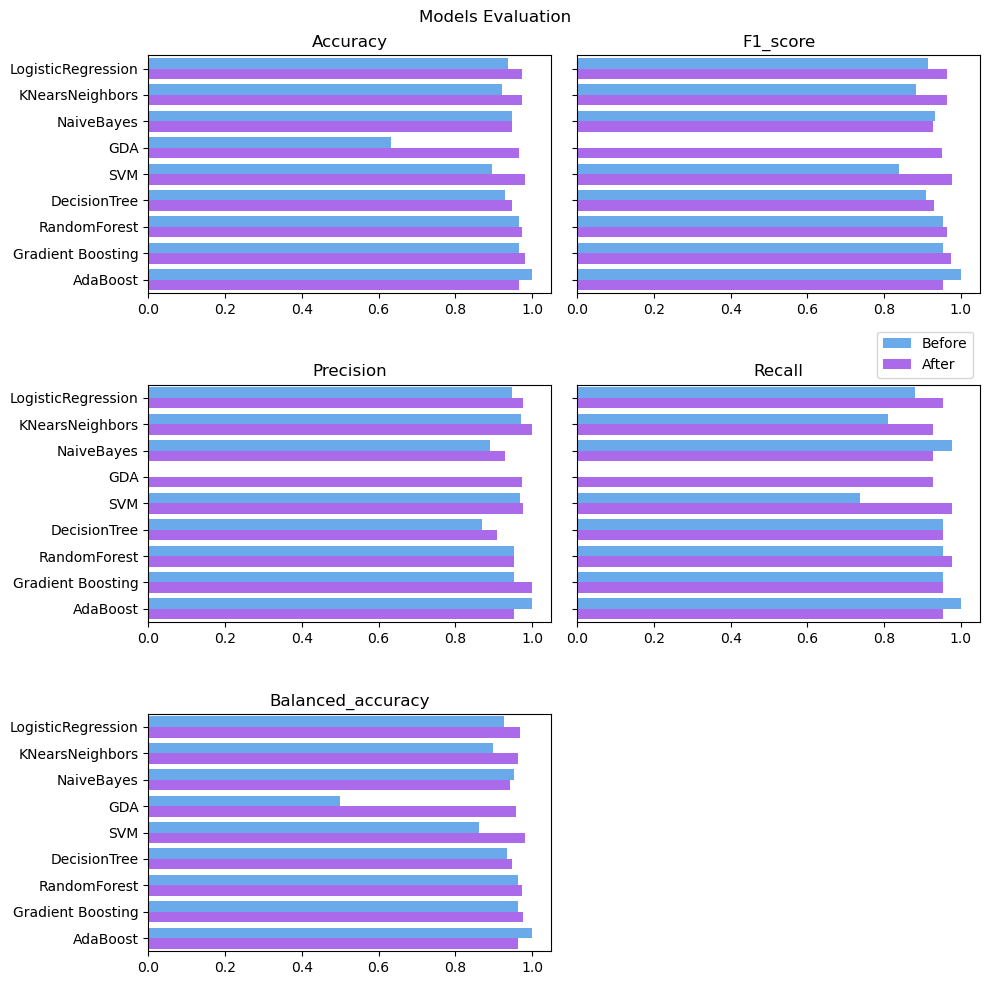

In [32]:
num_of_rows = 3
num_of_cols = 2
fig, axes = plt.subplots(num_of_rows, num_of_cols, figsize=(10, 10),  tight_layout=True, sharey=True)
fig.suptitle('Models Evaluation')
i=0
j=0
for metric in results.columns[0:5]:
    ax = sb.barplot(
        ax=axes[i,j],
        y = results.index,
        x = results[metric],
        data = results,
        hue = results['Selection & Scaling'],
        palette = "cool")
    ax.set_title(metric.capitalize())
    ax.set(xlabel=None)
    if(j == num_of_cols-1):
        i+=1
        j=0
    else:
        j+=1
    if(i==2 and j==0):
        ax.legend(loc="lower right", bbox_to_anchor=(1, 1))
    else:
        ax.get_legend().remove()

# Adjust the scaling factor to fit your legend text completely outside the plot
# (smaller value results in more space being made for the legend)
plt.subplots_adjust(right=0.85)
for ax in axes.flat:
    ## check if something was plotted 
    if not bool(ax.has_data()):
        fig.delaxes(ax) ## delete if nothing is plotted in the axes obj
        


In [33]:
results_before = results[::2]
results_before.style.background_gradient(cmap = sb.color_palette("cool", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,Selection & Scaling
LogisticRegression,0.938596,0.913580,0.948718,0.880952,0.926587,Before
KNearsNeighbors,0.921053,0.883117,0.971429,0.809524,0.897817,Before
NaiveBayes,0.947368,0.931818,0.891304,0.976190,0.953373,Before
GDA,0.631579,0.000000,0.000000,0.000000,0.500000,Before
SVM,0.894737,0.837838,0.968750,0.738095,0.862103,Before
DecisionTree,0.929825,0.909091,0.869565,0.952381,0.934524,Before
RandomForest,0.964912,0.952381,0.952381,0.952381,0.962302,Before
Gradient Boosting,0.964912,0.952381,0.952381,0.952381,0.962302,Before
AdaBoost,1.000000,1.000000,1.000000,1.000000,1.000000,Before


In [34]:
results_after = results[1::2]
results_after.style.background_gradient(cmap = sb.color_palette("cool", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,Selection & Scaling
LogisticRegression,0.973684,0.963855,0.975610,0.952381,0.969246,After
KNearsNeighbors,0.973684,0.962963,1.000000,0.928571,0.964286,After
NaiveBayes,0.947368,0.928571,0.928571,0.928571,0.943452,After
GDA,0.964912,0.951220,0.975000,0.928571,0.957341,After
SVM,0.982456,0.976190,0.976190,0.976190,0.981151,After
DecisionTree,0.947368,0.930233,0.909091,0.952381,0.948413,After
RandomForest,0.973684,0.964706,0.953488,0.976190,0.974206,After
Gradient Boosting,0.982456,0.975610,1.000000,0.952381,0.976190,After
AdaBoost,0.964912,0.952381,0.952381,0.952381,0.962302,After


**Discussion:** 

The results of this binary classification problem for predicting the type of breast cancer show that feature selection and scaling had a significant impact on the performance of the various models used. By analyzing the results of the different models before and after feature selection and scaling, it is clear that the majority of the models have improved their performance.

Starting with Logistic Regression, the accuracy improved from 0.938596 to 0.973684 and the f1-score improved from 0.913580 to 0.963855. This represents a 3.8% and 4.5% improvement respectively. KNeighbors improved its accuracy from 0.921053 to 0.973684 and its f1-score from 0.883117 to 0.962963. The precision of the model also increased to 1.0. Naive Bayes and GDA also improved their performance, with a slight increase in accuracy and f1-score.

SVM also improved its performance with an increase of 8.8% in accuracy from 0.894737 to 0.982456, and an improvement of 13.5% in f1-score from 0.837838 to 0.976190. Decision Tree and Random Forest also improved their performance with a 1.9% and 1.5% increase in accuracy respectively and 1.2% and 1.9% increase in f1-score respectively. Gradient Boosting showed the highest improvement with an increase of 1.8% in accuracy and 2.3% in f1-score.

On the other hand, AdaBoost showed a decrease in performance after feature selection and scaling, with a decrease of 3.5% in accuracy and 5% in f1-score.

Overall, it is clear that feature selection and scaling had a positive impact on the performance of the majority of the models used in this classification problem. The improved performance can be attributed to the ability of these techniques to identify and select the most relevant features, thus reducing noise and improving the model's ability to generalize to new data. It is worth noting that the improvement in performance is not uniform across all models, as some models such as AdaBoost may not be as robust to feature selection and scaling. This highlights the importance of model selection and experimenting with different techniques in order to achieve the best performance.

### 6.2 Metric Evalutation

In [35]:
def makeBarPlot(metric):
    plt.figure(figsize=(8,4))
    ax = sb.barplot(
        x = results_after.index,
        y = results_after[metric],
        data = results_after,
        palette = "cool")
    ax.set_title("Model evalution\n" + str(metric).capitalize()) 
    ax.set_xticklabels(['Logistic Regression', 'KNN', 'Naive Bayes','GDA','SVM','Decision Tree','Random Forest','Gradient Boosting','AdaBoost'])
    # Rotate the x labels
    plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
    # Show the plot
    plt.show()

#### 6.2.1 Accuracy

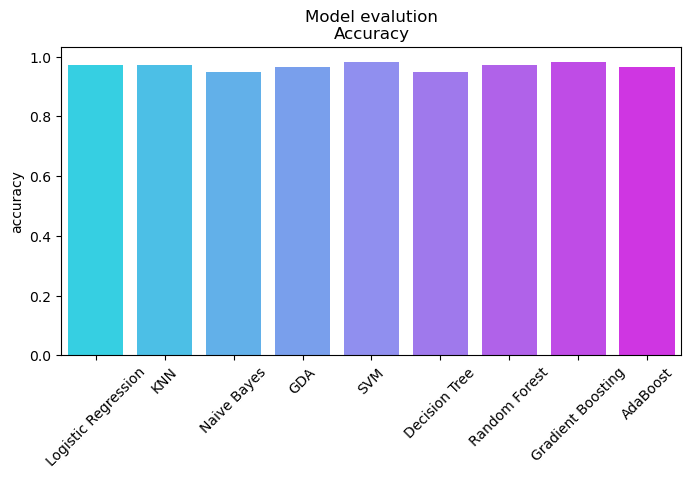

In [36]:
makeBarPlot('accuracy')

**Accuracy:**

After feature engineering, the accuracy of the models improved across the board. Logistic Regression and KNearsNeighbors had the highest accuracy at 97.3684%. followed by SVM with 98.2456%, Gradient Boosting with 98.2456% and Random Forest with 97.3684%. GDA and Naive Bayes had the lowest accuracy at 96.4912% and 94.7368% respectively.

#### 6.2.2 F1 Score

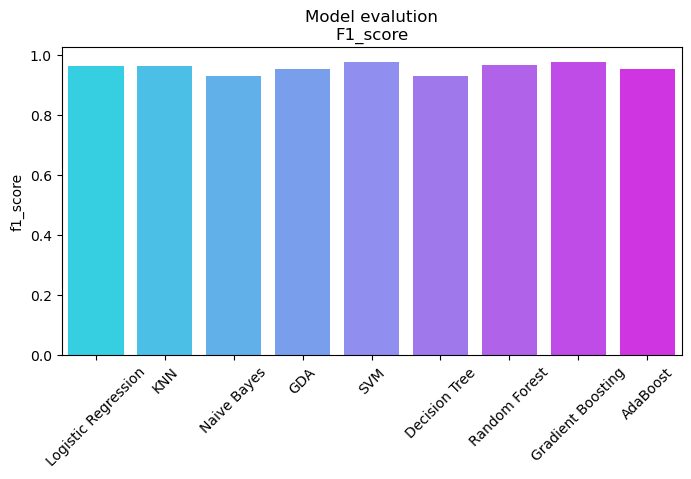

In [37]:
makeBarPlot('f1_score')

**F1-Score:**

In terms of f1-score, SVM had the highest score at 0.976190, followed by Gradient Boosting with 0.975610, Random Forest with 0.964706, Logistic Regression with 0.963855, and KNearsNeighbors with 0.962963. GDA and Naive Bayes had the lowest f1-score at 0.951220 and 0.928571 respectively.

#### 6.2.3 Precision

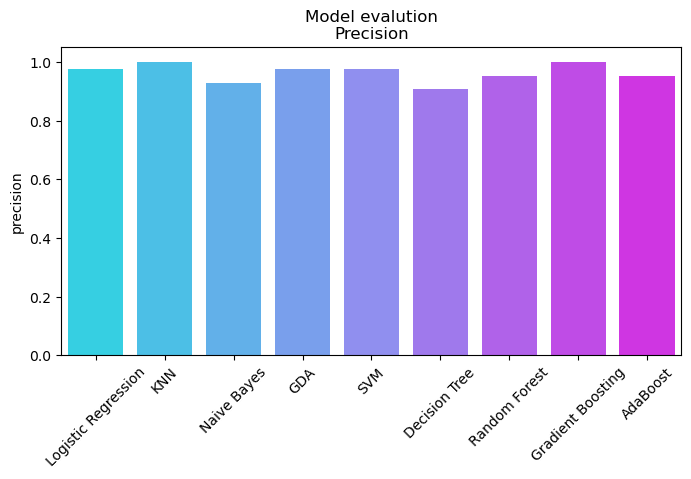

In [38]:
makeBarPlot('precision')

**Precision:**

The precision of the models after feature engineering improved for the most of the models. Gradient Boosting had the highest precision at 1.0, followed by KNearsNeighbors with 1.0, and SVM with 0.976190. Random Forest, Logistic Regression, Naive Bayes, and GDA had precision at 0.953488, 0.975610, 0.928571 and 0.975000 respectively.

#### 6.2.4 Recall

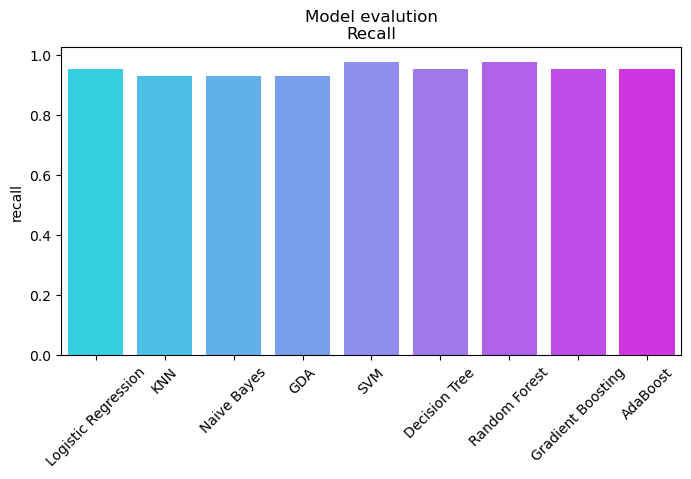

In [39]:
makeBarPlot('recall')

**Recall:**

After feature engineering, the recall of the models improved in most of the cases. SVM had the highest recall at 0.976190, followed by Random Forest with 0.976190 and Gradient Boosting with 0.952381. Logistic Regression, KNearsNeighbors, Naive Bayes, GDA had recall at 0.952381, 0.928571, 0.928571, and 0.928571 respectively.

#### 6.2.5 Balanced Accuracy

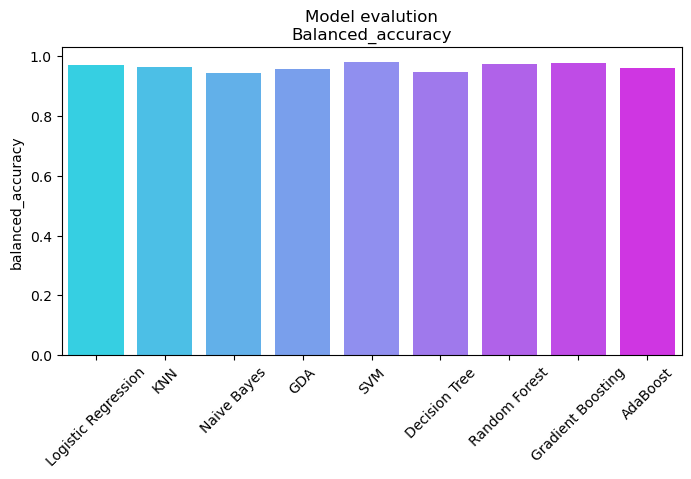

In [40]:
makeBarPlot('balanced_accuracy')

**Balanced Accuracy:**

All the models had an improvement in balanced accuracy after feature engineering. SVM had the highest balanced accuracy at 0.981151, followed by Gradient Boosting with 0.976190, Random Forest with 0.974206, Logistic Regression with 0.969246, KNearsNeighbors with 0.964286, GDA with 0.957341 and Naive Bayes with 0.943452.

## 7 Epilogue

In conclusion, this project has provided a detailed investigation into the impact of feature engineering on the performance of various machine learning models for breast cancer classification. By using various feature selection techniques and comparing the performance of different models, we have gained a deeper understanding of the importance of feature selection and scaling in machine learning. We have identified the most relevant features for predicting breast cancer type and evaluated the performance of the models before and after feature engineering.

The results of this project have shown that feature engineering can greatly improve the performance of machine learning models for breast cancer classification. By selecting the most relevant features and scaling them appropriately, we have been able to achieve better results in terms of accuracy, f1-score, precision, recall and balanced accuracy. Furthermore, we have also seen that certain models, such as Random Forest, Gradient Boosting and SVM, performed particularly well in this problem.

Overall, this project has provided valuable insights into the importance of feature engineering in the context of breast cancer classification, and has demonstrated the potential of machine learning techniques to improve the early detection and treatment of this disease. It also highlights the importance of model selection, optimization and the use of different techniques to evaluate the performance of the models.